# 多元线性回归
## 模型说明
在线性回归中，如果存在多个自变量时，我们称该线性回归为**多元线性回归**。

上节课中，我们学习了简单线性回归，并且使用房屋面积（$X$）来拟合房屋价格（$y$）。然而，现实中的数据通常是比较复杂的，自变量也很可能不只一个。例如，影响房屋价格不只房屋面积一个因素，可能还有距地铁距离，距市中心距离，房间数量，房屋所在层数，房屋建筑年代等诸多因素。不过，这些因素，对房屋价格影响的力度（权重）是不同的，例如，房屋所在层数对房屋价格的影响就远不及房屋面积，因此，我们可以为每个特征指定一个不同的权重。  
<font size=5>  
$\hat{y} = w_0 + w_{1} * x_{1} + w_{2} * x_{2} + w_{3} * x_{3} + \dots + w_{n} * x_{n}$  
</font>  

* $x_i$：第$i$个输入特征。
* $w_i$：第$i$个特征的权重（影响力度）。
* $n$：特征的个数。
* $\hat y$：预测值（房屋价格）。

## 向量表示
我们也可以使用向量的表示方式，设$\vec x$与$\vec w$为两个向量：  
<font size=5>  
$\vec w = (w_{1}, w_{2}, w_{3}, \dots, w_{n})^T \\ 
\vec x = (x_{1}, x_{2}, x_{3}, \dots, x_{n})^T$  
</font>  

则回归方程可表示为：  
<font size=5>  
$\hat{y} = \sum_{j=1}^{n}(w_{j} * x_{j}) + w_0 \\ 
= \vec w^T \cdot \vec x + w_0$  
</font>  

我们可以进一步简化，为向量$\vec w$与$\vec x$各加入一个分量$w_0$与$x_0$，并且令：  
<font size=5>  
$x_0 \equiv 1$  
</font>  

于是，向量$\vec w$与$\vec x$就会变成：  
<font size=5>  
$\vec w = (w_0, w_{1}, w_{2}, w_{3}, \dots, w_{n})^T \\ 
\vec x = (x_0, x_{1}, x_{2}, x_{3}, \dots, x_{n})^T$  
</font>  

这样，就可以表示为：  
<font size=5>  
$\hat{y} = w_{0} * x_{0} + w_{1} * x_{1} + w_{2} * x_{2} + w_{3} * x_{3} + \dots + w_{n} * x_{n} \\ 
= \sum_{j=0}^{n}(w_{j} * x_{j}) \\ 
= \vec w^T \cdot \vec x$  
</font>  

![图像无法显示](../imgs/exercise.png)
设$\vec w = (w_{1}, w_{2}, w_{3}, \dots, w_{n})^T$，则$\sum_{i=1}^{n}w_i^2$如果用向量表示，等价于（  ）。  
A $\vec w \cdot \vec w$  
B $\vec w^T \cdot \vec w$  
C $\vec w^T \cdot \vec w^T$  
D $\vec w \cdot \vec w^T$
![图像无法显示](../imgs/split_line.png)

## 参数估计
### 误差与分布
接下来，我们来看一下线性回归模型中的误差。正如我们之前所提及的，线性回归中的自变量与因变量，是存在线性关系的。然而，这种关系并不是严格的函数映射关系，但是，我们构建的模型（方程）却是严格的函数映射关系，因此，对于每个样本来说，我们拟合的结果会与真实值之间存在一定的误差，我们可以将误差表示为：  
<font size=5>  
$\hat{y} ^ {(i)} = \vec{w}^T \cdot \vec{x}^{(i)}\\
y ^ {(i)} = \hat{y}^{(i)} + \varepsilon^{(i)}
$
</font>

* $\varepsilon^{(i)}$：第$i$个样本真实值与预测值之间的误差（残差）。

对于线性回归而言，具有一个前提假设：误差$\varepsilon$服从均值为0，方差为$\sigma^2$的正态分布。因此，根据正态分布的概率密度函数：  
<font size=5>  
$f(x) = \frac{1}{\sqrt{2\pi}\sigma}exp(-\frac{(x - \mu)^2}{2\sigma^2})$
</font>

则误差$\varepsilon$的分布为：  
<font size=5>  
$p(\varepsilon) = \frac{1}{\sqrt{2\pi}\sigma}exp(-\frac{\varepsilon^2}{2\sigma^2})
$
</font>

因此，对于每一个样本的误差$\varepsilon^{(i)}$，其概率值为：  
<font size=5>  
$p(\varepsilon^{(i)};w) = \frac{1}{\sqrt{2\pi}\sigma}exp(-\frac{(\varepsilon^{(i)})^2}{2\sigma^2}) \\
= \frac{1}{\sqrt{2\pi}\sigma}exp(-\frac{(y^{(i)} - \vec{w}^T\vec{x}^{(i)})^2}{2\sigma^2})
$
</font>  

![图像无法显示](../imgs/summary.png)

### 极大似然估计
极大似然估计（最大似然估计），是根据试验结果来估计未知参数的一种方式。其原则为：已经出现的，就是最有可能出现的，也就是令试验结果的概率值最大，来求解此时的未知参数值。

根据该原则，我们让所有误差出现的联合概率最大，则此时参数w的值，就是我们要求解的值，我们构建似然函数：  
<font size=5>  
$L(w) = \prod_{i=1}^{m}p(\varepsilon^{(i)};w) \\ 
= \prod_{i=1}^{m}\frac{1}{\sqrt{2\pi}\sigma}exp(-\frac{(y^{(i)} - \vec{w}^T\vec{x}^{(i)})^2}{2\sigma^2})
$
</font>

* $m$：样本的数量。

### 对数似然函数
不过，累计乘积的方式不利于求解，我们这里使用对数似然函数，即在似然函数上取对数操作，这样就可以将累计乘积转换为累计求和的形式。  
<font size=5>  
$ln(L(w)) = ln\prod_{i=1}^{m}\frac{1}{\sqrt{2\pi}\sigma}exp(-\frac{(y^{(i)} - \vec{w}^T\vec{x}^{(i)})^2}{2\sigma^2}) \\
= \sum_{i=1}^{m}ln\frac{1}{\sqrt{2\pi}\sigma}exp(-\frac{(y^{(i)} - \vec{w}^T\vec{x}^{(i)})^2}{2\sigma^2}) \\
= m * ln\frac{1}{\sqrt{2\pi}\sigma} - \frac{1}{\sigma^2} * \frac{1}{2} * \sum_{i=1}^{m}(y^{(i)} - \vec{w}^T\vec{x}^{(i)})^2
$
</font>

![图像无法显示](../imgs/thinking.png)

* 我们原本的目的，是要求得令似然函数$L(w)$最大时，参数$w$的值。
* 然而，我们对似然函数$L(w)$取对数，得到对数似然函数$ln(L(w))$，这样，就会将原似然函数$L(w)$改变。
* 那这样一来，在对数似然函数$ln(L(w))$取得极大值时，计算得出的$w$会与原似然函数$L(w)$取得极大值，计算的$w$相同吗？


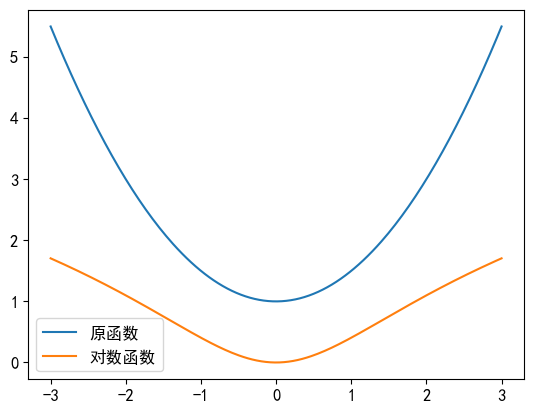

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "SimHei"
plt.rcParams["axes.unicode_minus"] = False
plt.rcParams["font.size"] = 12

x = np.linspace(-3, 3, 200)
# 原函数。
y = 0.5 * x ** 2 + 1
# 对数函数。
lny = np.log(y)
plt.plot(x, y, label="原函数")
plt.plot(x, lny, label="对数函数")
plt.legend()

### 损失函数
上式中，前半部分都是常数，我们的目的是为了让对数似然函数值最大，故我们只需要让后半部分的值最小即可，因此，后半部分，就可以作为线性回归的损失函数。该函数是二次函数，具有唯一极小值。  
<font size=5>  
$J(w) = \frac{1}{2} * \sum_{i=1}^{m}(y^{(i)} - \vec{w}^T\vec{x}^{(i)})^2 \qquad (1)$
</font>  

### 损失函数向量化表示
在上面的损失函数中，我们是使用标量的方式来表示的。这不方便在实际应用中计算，我们可以采用矩阵与向量的方式来表示。

<font size=5>  
$%定义向量y。
\vec{y} = \begin{bmatrix}
y^{(1)} \\ 
y^{(2)} \\ 
\dots \\ 
y^{(m)}
\end{bmatrix} \\
%定义向量y_hat。
\vec{\hat{y}} = \begin{bmatrix}
\hat{y}^{(1)} \\ 
\hat{y}^{(2)} \\ 
\dots \\ 
\hat{y}^{(m)}
\end{bmatrix} = 
% y_hat的展开。
\begin{bmatrix}
\vec{w}^T\vec{x}^{(1)} \\ 
\vec{w}^T\vec{x}^{(2)} \\ 
\dots \\ 
\vec{w}^T\vec{x}^{(m)}
\end{bmatrix} =
%y_hat再次展开。
\begin{bmatrix}
w_0x_0^{(1)} + w_1x_1^{(1)} + w_2x_2^{(1)} + \dots + w_nx_n^{(1)} \\ 
w_0x_0^{(2)} + w_1x_1^{(2)} + w_2x_2^{(2)} + \dots + w_nx_n^{(2)} \\ 
\dots \\ 
w_0x_0^{(m)} + w_1x_1^{(m)} + w_2x_2^{(m)} + \dots + w_nx_n^{(m)} \\ 
\end{bmatrix} \\
%提取X矩阵元素与w向量元素。
= \begin{bmatrix}
x_0^{(1)}, x_1^{(1)}, x_2^{(1)}, \dots, x_n^{(1)} \\ 
x_0^{(2)}, x_1^{(2)}, x_2^{(2)}, \dots, x_n^{(2)} \\ 
\dots \\ 
x_0^{(m)}, x_1^{(m)}, x_2^{(m)}, \dots, x_n^{(m)}
\end{bmatrix} \cdot
\begin{bmatrix}
w_0 \\
w_1 \\ 
w_2 \\ 
\dots \\ 
w_n
\end{bmatrix} = X\cdot \vec{w} \qquad \Rightarrow
$
</font>

<font size=5>
$%定义向量epsilon。
\vec{\varepsilon} = \begin{bmatrix}
\varepsilon^{(1)} \\ 
\varepsilon^{(2)} \\ 
\dots \\ 
\varepsilon^{(m)}
\end{bmatrix} = 
% 定义向量epsilon展开式。
\begin{bmatrix}
y^{(1)} - \hat{y}^{(1)} \\ 
y^{(2)} - \hat{y}^{(2)} \\ 
\dots \\ 
y^{(m)} - \hat{y}^{(m)}
\end{bmatrix} =
% 向量y - y_hat。
\vec{y} - \vec{\hat{y}} =
\vec{y} - X \cdot \vec{w} \qquad \Rightarrow \\
% epsilon转换为矩阵表示。
\sum_{i=1}^{m}(\varepsilon^{(i)})^2 = \vec{\varepsilon}^T \cdot \vec{\varepsilon}
= (\vec{y} - X\vec{w})^T(\vec{y} - X\vec{w}) \qquad （2）
$
</font>

将（2）带入（1）：  
<font size=5>  
$J(w) = \frac{1}{2} * \sum_{i=1}^{m}(y^{(i)} - \vec{w}^T\vec{x}^{(i)})^2 \\
= \frac{1}{2} * (\vec{y} - X\vec{w})^T(\vec{y} - X\vec{w})
$
</font>

### 损失函数求导
我们要求该损失函数的最小值，只需要对向量$\vec{w}$进行求导，令导数为0，此时$\vec{w}$的值，就是最佳解。  
<font size=5>  
$\frac{\partial J(w)}{\partial \vec{w}} = 
\frac{\partial}{\partial \vec{w}}(\frac{1}{2}(\vec{y} - X\vec{w})^T(\vec{y} - X\vec{w})) \\ 
= \frac{\partial}{\partial \vec{w}}(\frac{1}{2}(\vec{y}^T - \vec{w}^TX^T)(\vec{y} - X\vec{w}))\\ 
= \frac{\partial}{\partial \vec{w}}(\frac{1}{2}(\vec{y}^T\vec{y} - \vec{y}^TX\vec{w} - \vec{w}^TX^T\vec{y} + \vec{w}^TX^TX\vec{w}))
$</font>

### 损失函数化简
根据矩阵与向量的求导公式，有：  
<font size=5>  
$\frac{\partial A\vec{x}}{\partial \vec{x}} = A^T \qquad 
\frac{\partial A\vec{x}}{\partial \vec{x}^T} = A \qquad
\frac{\partial (\vec{x}^TA)}{\partial \vec{x}} = A \\ 
\frac{\partial (\vec{x}^TA\vec{x})}{\partial \vec{x}} = (A^T + A)\vec{x}
$
</font>

特别的，如果$A = A ^ {T}$（A为对称矩阵），则：  
<font size=5>  
$\frac{\partial (\vec{x}^TA\vec{x})}{\partial \vec{x}} = 2A\vec{x}
$</font>

因此：  
<font size=5>  
$\frac{\partial}{\partial \vec{w}}(\frac{1}{2}(\vec{y}^T\vec{y} - \vec{y}^TX\vec{w} - \vec{w}^TX^T\vec{y} + \vec{w}^TX^TX\vec{w})) \\ 
= \frac{1}{2}(-(\vec{y}^TX)^T - X^T\vec{y} + 2X^TX\vec{w}) \\ 
= X^{T}X\vec{w} - X^T\vec{y}
$</font>

令导函数的值为0，则：  
<font size=5>  
$\vec{w} = (X^TX)^{-1}X^T\vec{y}$</font>

* 矩阵$X^TX$必须是可逆的。

In [8]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

data = pd.read_csv("Advertising.csv", usecols=["TV","Radio","Newspaper","Sales"], header=0)
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
X, y = data[["TV", "Radio", "Newspaper"]], data["Sales"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.coef_)
print(lr.intercept_)
y_hat = lr.predict(X_test)
print(y_hat[:5])
print(y_test[:5])

[0.04391531 0.20027962 0.00184368]
2.880255286331325
[10.05866652  7.43318827  6.95305695 24.16874598 11.98172029]
18     11.3
170     8.4
107     8.7
98     25.4
177    11.7
Name: Sales, dtype: float64


In [22]:
# 自力更生。
X = X_train.values
y = y_train.values
one = np.ones(shape=(len(X), 1))
X = np.concatenate([one, X], axis=1)
# np.linalg.inv求矩阵的逆。
w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print(w)

[2.88025529e+00 4.39153137e-02 2.00279617e-01 1.84368178e-03]


![图像无法显示](../imgs/extend.png)
## 三维可视化
多元线性回归在空间中，可以表示为一个超平面，去拟合空间中的数据点。这里，为了可视化方便，我们仅选取NOX与RM两个特征（自变量）进行拟合。

In [ ]:
# 提取前两个特征。
X_partial = X[["TV", "Radio"]].values
lr2 = LinearRegression()
lr2.fit(X_partial, y)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
# 图形显示方式，默认为嵌入显示。
# %matplotlib inline
# 弹出框显示。
%matplotlib qt

# 分别提取两个特征的最小值与最大值。
max1, max2 = np.max(X_partial, axis=0)
min1, min2 = np.min(X_partial, axis=0)
# 在区间取值区间内，均匀选取若干个点。
x1 = np.linspace(min1, max1, 30)
x2 = np.linspace(min2, max2, 30)
# 生成网状结果，用来绘制三维立体图。
# 参数x1与x2是一维数组（向量）,将x1沿着行进行扩展，扩展的行数与x2元素的个数相同。
# 将x2沿着列进行扩展，扩展的列数与x1元素的个数相同。返回x1与x2扩展之后的数据X1与X2（扩展之后
# 的数组是二维的）。
# 这样扩展的目的是，依次对位获取X1与X2（扩展之后的数组）中的每个元素，
# 就能够构成x1与x2（扩展之前的数组）的任意组合。
X1, X2 = np.meshgrid(x1, x2)
# 返回figure对象。figure对象是我们绘图的底层对象，相当于画布。
fig = plt.figure()
# Axes3D在figure对象上进行绘制。
ax = Axes3D(fig)
fig.add_axes(ax)
# 绘制真实的样本散点图。
ax.scatter(X_partial[:, 0], X_partial[:, 1], y, color="b")
ax.set_xlabel("TV投放额度")
ax.set_ylabel("Radio投放额度")
ax.set_zlabel("销售额")
# 绘制预测的平面。
# rstride：行上的增量。增量越大，网格越宽。
# cstride：列上的增量。
# cmap：颜色图。
# alpha：透明度。1 完全不透明，0完全透明。
surf = ax.plot_surface(X1, X2, lr2.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
        rstride=5, cstride=5, cmap="rainbow", alpha=0.5)
# 显示颜色条。
fig.colorbar(surf)
plt.show()

# 回归模型评估
当我们建立好模型后，模型的效果如何呢？对于回归模型，我们可以采用如下的指标来进行衡量。  
* MSE
* RMSE
* MAE
* $R^2$

## MSE
MSE（Mean Squared Error），平均平方误差，为所有样本数据误差（真实值与预测值之差）的平方和，然后取均值。  
<font size=5>  
$MSE = \frac{1}{m}\sum_{i=1}^{m}(y ^ {(i)} - \hat{y} ^ {(i)}) ^ {2}$
</font>

## RMSE
RMSE（Root Mean Squared Error），平均平方误差的平方根，即在MSE的基础上，取平方根。  
<font size=5>  
$RMSE = \sqrt{MSE} = \sqrt{\frac{1}{m}\sum_{i=1}^{m}(y ^ {(i)} - \hat{y} ^ {(i)}) ^ {2}}$
</font>

## MAE
MAE（Mean Absolute Error），平均绝对值误差，为所有样本数据误差的绝对值和。  
<font size=5>  
$MAE = \frac{1}{m}\sum_{i=1}^{m}|y ^ {(i)} - \hat{y} ^ {(i)}|$  
</font>

## $R^2$
$R^2$为决定系数，用来表示模型拟合性的分值，值越高表示模型拟合性越好，在训练集中，$R^2$的取值范围为$[0, 1]$。在测试集（未知数据）中，$R^2$的取值范围为$(-\infty, 1]$。  
$R^2$的计算公式为1减去RSS与TSS的商。其中，TSS（Total Sum of Squares）为所有样本数据与均值的差异，是方差的$m$倍。而RSS（Residual sum of squares）为所有样本数据误差的平方和，是MSE的$m$倍。  
<font size=5>  
$R^2 = 1 - \frac{RSS}{TSS} = 1 - \frac{\sum_{i=1}^{m}(y^{(i)} - \hat{y}^{(i)})^2}
{\sum_{i=1}^{m}(y^{(i)} - \bar{y})^2} \\ 
\bar{y} = \frac{1}{m}\sum_{i=1}^{m}y^{(i)}
$
</font>

从公式定义可知，最理想情况，所有的样本数据的预测值与真实值相同，即RSS为0，此时$R^2$为1。

In [ ]:
# MSE，MAE，R^2函数。
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("均方误差(MSE)：", mean_squared_error(y_test, y_hat))
print("根均方误差(RMSE)：", np.sqrt(mean_squared_error(y_test, y_hat)))
print("平均绝对值误差(MAE)：", mean_absolute_error(y_test, y_hat))
print("训练集R^2：", r2_score(y_train, lr.predict(X_train)))
print("测试集R^2：", r2_score(y_test, y_hat))
# socre其实求解的就是r^2的值。但是注意，r2_score方法与score方法传递参数的内容是不同的。
print("训练集R^2：", lr.score(X_train, y_train))
print("测试集R^2：", lr.score(X_test, y_test))

## 模型持久化
当我们训练好模型后，就可以使用模型进行预测。然而，这毕竟不像打印一个Hello World那样简单，当我们需要的时候，重新运行一次就可以了。在实际生产环境中，数据集可能非常庞大，如果在我们每次需要使用该模型时，都去重新运行程序去训练模型，势必会耗费大量的时间。

为了方便以后能够复用，我们可以将模型保存，在需要的时候，直接加载之前保存的模型，就可以直接进行预测。其实，保存模型，就是保存模型的参数（结构），在载入模型的时候，将参数（结构）恢复成模型保存时的参数（结构）而已。

### 保存模型
注意：保存模型时，保存位置的目录必须事先存在，否则会出现错误。

In [ ]:
# 糖尿病数据集。
from sklearn.datasets import load_diabetes
import joblib

# return_X_y：返回X与y，而不是返回数据对象。
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.coef_, lr.intercept_)
# 对模型进行保存。(模型保存的目录必须事先存在，否则会产生错误。)
joblib.dump(lr, "lr.model")

### 载入模型
我们可以载入之前保存的模型，进行预测。

In [ ]:
# 恢复保存的模型。
model = joblib.load("lr.model")
print(type(model))
print(model.coef_, model.intercept_)
y_hat = model.predict(X_test)
print(y_hat[:10])

![图形无法显示](../imgs/summary.png "小结")

# 练习
* 参考sklearn中的LinearRegression，自己编写一个简单的线性回归类，能够实现多元线性回归。要求如下：
    + 具有fit方法，训练模型。
    + 具有predict方法，预测未知数据。
    + 具有coef_属性，返回所有权重（不包括偏置$w_0$）。
    + 具有intercept_属性，返回偏置$b$（$w_0$）。
    + 不允许借助于sklearn中的LinearRegression类。